CHASM allows for users to implement custom parameterizations for the charged particle energy and angular distribution. This notebook demonstrates how custom custom charged particle distributions can be used to create Cherenkov light angular distribution. 

In [1]:
from charged_particle_ABC import *
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Let's say instead of the Nerling parameterization for the charged particle energy distribution we want to instead use a simple Gaussian, with mean and scaling parameters dependent on shower stage. We'll use the scipy stats normal distribution so we don't have to write the actual function. To create an energy distribution object we will define a class which inherits from EnergyDistribution(), and simply implement the n_t_lE() method. An EnergyDistribution() comes with methods to normalize the distribution, as well as reset the stage (default is t = 0, which is X_max) at which we desire a distribution. The stage is stored as the 't' attribute, and the normalization constant is stored as the 'C0' attribute, which must be included as a prefactor in the n_t_lE() method. The lower and upper limits to the particle energies respectively are stored as 'll' and 'ul'.

Text(0, 0.5, 'dn / dlE')

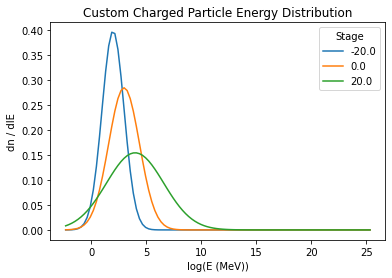

In [2]:
from scipy.stats import norm

class GaussianEnergyDistribution(EnergyDistribution):
    '''
    This is an implementation of an energy distribution class
    where the distribution is a Gaussian.
    '''
    
    #some parameters that depend on the stage:
    @property
    def mu(self):
        return self.t / 20. + 3.
    
    @property
    def sig(self):
        return 1.e-3 * (self.t + 20.)**2 + 1.
    
    def n_t_lE(self, lE):
        '''This method, which is the PDF, must be implemented for the class to be instantiated.
        It must include the prefactor "self.C0" which is the normaliztion constant'''
        return self.C0 * norm.pdf(lE, loc=self.mu, scale=self.sig)

ed = GaussianEnergyDistribution(-20.)
lEs = np.linspace(ed.ll,ed.ul,100)

plt.figure()
plt.plot(lEs, ed.n_t_lE(lEs), label=ed.t)

ed.set_stage(0.)
plt.plot(lEs, ed.n_t_lE(lEs), label=ed.t)

ed.set_stage(20.)
plt.plot(lEs, ed.n_t_lE(lEs), label=ed.t)

plt.legend(title='Stage')
plt.title('Custom Charged Particle Energy Distribution')
plt.xlabel('log(E (MeV))')
plt.ylabel('dn / dlE')

It's also possible to implement a custom charged particle angular distribution. For simplicity let's again use a gaussian

Text(0, 0.5, 'n(t;lE,Omega)')

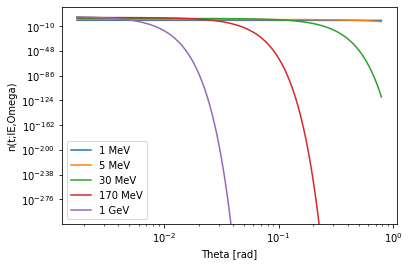

In [19]:
class GaussianAngularDistribution(AngularDistribution):
    
    #some parameter that depends on the energy
    @property
    def sig(self):
        return 1. / self.E
    
    def n_t_lE_Omega(self, theta):
        return self.C0 * norm.pdf(theta, scale=self.sig)
    
qd = GaussianAngularDistribution(np.log(1.))
ll = np.radians(0.1)
ul = np.radians(45.)
lqrad = np.linspace(np.log(ll),np.log(ul),450)
qrad = np.exp(lqrad)

fig = plt.figure()
plt.plot(qrad,qd.n_t_lE_Omega(qrad),label='1 MeV')
qd.set_lE(np.log(5.))
plt.plot(qrad,qd.n_t_lE_Omega(qrad),label='5 MeV')
qd.set_lE(np.log(30.))
plt.plot(qrad,qd.n_t_lE_Omega(qrad),label='30 MeV')
qd.set_lE(np.log(170.))
plt.plot(qrad,qd.n_t_lE_Omega(qrad),label='170 MeV')
qd.set_lE(np.log(1.e3))
plt.plot(qrad,qd.n_t_lE_Omega(qrad),label='1 GeV')
plt.loglog()
plt.legend()
plt.xlabel('Theta [rad]')
plt.ylabel('n(t;lE,Omega)')